In [3]:
!pip install geopandas
!pip install geojson

     |████████████████████████████████| 1.0 MB 16.2 MB/s 
     |████████████████████████████████| 6.3 MB 50.3 MB/s 
     |████████████████████████████████| 15.4 MB 40 kB/s 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/COMPETENCIAS /NASA - COVID - MIT_critical_data/data

/content/drive/MyDrive/COMPETENCIAS /NASA - COVID - MIT_critical_data/data


In [5]:
import json
import geopandas as gpd
import pandas as pd
import geojson

In [9]:
departments = "departments_and_risk.geosjon"
# Opening JSON file
f = open(departments,)
 
# returns JSON object as
# a dictionary
data = json.load(f)

In [7]:
data

{'bbox': [-81.7388178590952,
  -4.22861351876333,
  -66.8472151720164,
  13.3973620757286],
 'features': [{'bbox': [-74.4517633670246,
    3.72976810381007,
    -73.9963153098687,
    4.83560576103766],
   'geometry': {'coordinates': [[[-74.0696436581778, 4.82983260498634],
      [-74.0694575540154, 4.82981708637489],
      [-74.0692889209605, 4.8298270366282],
      [-74.0689763652432, 4.82989925448052],
      [-74.0686932036631, 4.83001785170221],
      [-74.0685371149162, 4.83010269401866],
      [-74.0682822268923, 4.83026902601664],
      [-74.0680977428917, 4.83040976981371],
      [-74.0678163215647, 4.83065473095337],
      [-74.0675030694803, 4.83096463015788],
      [-74.0662745005007, 4.83234929089392],
      [-74.0658393582815, 4.83280905362554],
      [-74.0655350959848, 4.83309977904961],
      [-74.0652741481101, 4.83332617879261],
      [-74.0648585304576, 4.83364108691027],
      [-74.0646311234869, 4.83378888859988],
      [-74.0643353935925, 4.83395444509686],
      

In [10]:
df_places = gpd.read_file(departments)
df_places.NOMBRE_DPT[df_places.NOMBRE_DPT == 'archipielagodesanandres,providenciaysantacatalina'] = 'sanandres'
df_places.NOMBRE_DPT = df_places.NOMBRE_DPT.str.strip()
df_places.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


id  AREA_OFICI  ...  risk                                           geometry
0  0        1605  ...   2.0  POLYGON ((-74.06964 4.82983, -74.06946 4.82982...
1  1       26383  ...   1.0  POLYGON ((-75.25600 10.79971, -75.25547 10.799...
2  2       23189  ...   0.0  POLYGON ((-72.15949 7.04211, -72.15852 7.04148...
3  3        7888  ...   2.0  POLYGON ((-74.67036 5.77004, -74.66925 5.76905...
4  4       88965  ...   0.0  POLYGON ((-74.78494 2.92441, -74.78492 2.89536...

[5 rows x 7 columns]

In [11]:
# To unite
spatial_data_path = "spatial_data_merge_by_date.csv"

spatial_data = pd.read_csv(spatial_data_path)

mutations = pd.read_csv('Covid19_alpha_preprocessed.csv')

spatial_data.drop(columns=['Unnamed: 0'], inplace=True)
mutations.drop(columns=['Unnamed: 0'], inplace=True)
mutations

Date  antioquia  ...  santander  valledelcauca
0   2021-01-04 00:00:00   0.000000  ...   0.000000       1.000000
1   2021-01-05 00:00:00   0.000000  ...   0.000000       0.000000
2   2021-01-14 00:00:00   1.000000  ...   0.000000       0.000000
3   2021-02-15 00:00:00   0.000000  ...   0.000000       0.000000
4   2021-02-19 00:00:00   0.000000  ...   0.000000       0.000000
5   2021-02-26 00:00:00   1.000000  ...   0.000000       0.000000
6   2021-03-04 00:00:00   0.000000  ...   0.000000       0.000000
7   2021-03-05 00:00:00   0.000000  ...   1.000000       0.000000
8   2021-03-15 00:00:00   1.000000  ...   0.000000       0.000000
9   2021-03-18 00:00:00   0.000000  ...   0.000000       0.000000
10  2021-03-22 00:00:00   0.000000  ...   0.000000       0.000000
11  2021-03-24 00:00:00   0.000000  ...   0.000000       0.000000
12  2021-03-25 00:00:00   0.000000  ...   0.000000       0.000000
13  2021-03-26 00:00:00   0.000000  ...   0.000000       0.000000
14  2021-03-27 00:00:00   1.000000  ...   0.000000       0.000000
15  2021-03-29 00:00:00   1.000000  ...   0.000000       0.000000
16  2021-03-30 00:00:00   0.000000  ...   0.000000       0.000000
17  2021-03-31 00:00:00   0.000000  ...   0.000000       1.000000
18  2021-04-04 00:00:00   1.000000  ...   0.000000       0.000000
19  2021-04-05 00:00:00   0.000000  ...   0.000000       1.000000
20  2021-04-13 00:00:00   1.000000  ...   0.000000       0.000000
21  2021-04-14 00:00:00  36.000000  ...   0.000000       0.000000
22  2021-04-15 00:00:00   1.000000  ...   0.000000       0.000000
23  2021-04-16 00:00:00   0.000000  ...   0.000000       0.000000
24  2021-04-17 00:00:00   0.000000  ...   0.000000       1.000000
25  2021-04-19 00:00:00   0.000000  ...   0.000000       9.000000
26  2021-04-20 00:00:00   1.000000  ...   0.000000       0.000000
27  2021-04-21 00:00:00   0.000000  ...   1.000000       0.000000
28  2021-04-24 00:00:00   0.000000  ...   1.000000       1.000000
29  2021-04-25 00:00:00   1.000000  ...   0.000000       0.000000
30  2021-04-26 00:00:00   1.000000  ...   0.000000       0.000000
31  2021-04-27 00:00:00   1.000000  ...   0.000000       0.000000
32  2021-04-29 00:00:00   0.000000  ...   0.000000       0.000000
33  2021-05-03 00:00:00   1.000000  ...   0.000000       0.000000
34  2021-05-04 00:00:00   4.000000  ...   0.000000       0.000000
35  2021-05-16 00:00:00   1.000000  ...   0.000000       0.000000
36  2021-05-19 00:00:00   1.000000  ...   0.000000       0.000000
37  2021-05-25 00:00:00   1.000000  ...   0.000000       0.000000
38  2021-06-03 00:00:00   1.000000  ...   0.000000       0.000000
39  2021-06-04 00:00:00   1.000000  ...   0.000000       0.000000
40  2021-06-05 00:00:00   0.000000  ...   0.000000       1.000000
41  2021-07-04 00:00:00   0.000000  ...   0.000000       0.000000
42  2021-07-05 00:00:00   0.000000  ...   0.000000       0.000000
43  2021-08-04 00:00:00   0.000000  ...   0.000000       9.000000
44  2021-09-04 00:00:00   9.000000  ...   0.000000       1.000000
45  2021-10-03 00:00:00   0.000000  ...   0.000000       0.000000
46  2021-10-04 00:00:00   0.000000  ...   0.000000       0.000000
47  2021-10-05 00:00:00   1.000000  ...   0.000000       0.000000
48  2021-11-04 00:00:00   0.000000  ...   0.000000       1.000000
49  2021-12-04 00:00:00   0.000000  ...   0.000000       1.000000
50             Latitude   6.702032  ...   6.693633       3.569859
51            Longitude -75.504557  ... -73.486009     -76.628504

[52 rows x 12 columns]

In [12]:
spatial_data = spatial_data.groupby(["Date"]).mean().reset_index()
spatial_data

Date        T2M     T2MDEW         TS  PRECTOTCORR         PS
0    2021-04-01  21.883827  17.777160  22.075062     1.505185  87.430000
1    2021-04-02  21.409259  17.922346  21.575062     7.052593  87.522716
2    2021-04-03  21.557778  17.540864  21.788025     4.298272  87.624815
3    2021-04-04  21.728272  17.577654  22.014568     0.550494  87.587037
4    2021-04-05  21.692963  17.570247  22.017531     0.281111  87.589630
..          ...        ...        ...        ...          ...        ...
129  2021-08-08  19.774938  17.864568  19.940988    32.977160  87.933827
130  2021-08-09  20.134444  18.256667  20.284568    33.886420  87.893704
131  2021-08-10  20.263086  18.234074  20.249259    34.912346  87.902840
132  2021-08-11  19.990864  17.956790  20.067778    24.430247  87.922840
133  2021-08-12  20.129877  17.837037  20.281481    23.355309  87.942346

[134 rows x 6 columns]

In [13]:
x = [ ]
for i in spatial_data["Date"]:
  x.append(i + ' 00:00:00')
spatial_data["Date"] = x
spatial_data.head(5)

Date        T2M     T2MDEW         TS  PRECTOTCORR         PS
0  2021-04-01 00:00:00  21.883827  17.777160  22.075062     1.505185  87.430000
1  2021-04-02 00:00:00  21.409259  17.922346  21.575062     7.052593  87.522716
2  2021-04-03 00:00:00  21.557778  17.540864  21.788025     4.298272  87.624815
3  2021-04-04 00:00:00  21.728272  17.577654  22.014568     0.550494  87.587037
4  2021-04-05 00:00:00  21.692963  17.570247  22.017531     0.281111  87.589630

In [14]:
mutations = mutations.merge(spatial_data, how='inner', on=['Date'])
mutations = mutations.reset_index()
mutations

index                 Date  antioquia  ...         TS  PRECTOTCORR         PS
0       0  2021-04-04 00:00:00        1.0  ...  22.014568     0.550494  87.587037
1       1  2021-04-05 00:00:00        0.0  ...  22.017531     0.281111  87.589630
2       2  2021-04-13 00:00:00        1.0  ...  22.146173     3.426667  87.682099
3       3  2021-04-14 00:00:00       36.0  ...  21.467407     1.134938  87.701975
4       4  2021-04-15 00:00:00        1.0  ...  21.553827     6.199753  87.645309
5       5  2021-04-16 00:00:00        0.0  ...  21.626790     6.986049  87.670494
6       6  2021-04-17 00:00:00        0.0  ...  21.199259    16.771111  87.732222
7       7  2021-04-19 00:00:00        0.0  ...  20.946667    16.125802  87.836420
8       8  2021-04-20 00:00:00        1.0  ...  21.129506     3.030741  87.807778
9       9  2021-04-21 00:00:00        0.0  ...  21.250864     4.318025  87.794568
10     10  2021-04-24 00:00:00        0.0  ...  22.216667     0.593086  87.715802
11     11  2021-04-25 00:00:00        1.0  ...  21.785926     3.285556  87.683580
12     12  2021-04-26 00:00:00        1.0  ...  22.101358     3.440123  87.645926
13     13  2021-04-27 00:00:00        1.0  ...  21.058765     2.724938  87.674938
14     14  2021-04-29 00:00:00        0.0  ...  20.680123     3.589877  87.838395
15     15  2021-05-03 00:00:00        1.0  ...  20.729383     0.581728  87.943457
16     16  2021-05-04 00:00:00        4.0  ...  21.440247     0.792840  87.915802
17     17  2021-05-16 00:00:00        1.0  ...  22.666667     0.528765  87.740741
18     18  2021-05-19 00:00:00        1.0  ...  22.739877     0.184321  87.736420
19     19  2021-05-25 00:00:00        1.0  ...  22.110000     4.508148  87.783210
20     20  2021-06-03 00:00:00        1.0  ...  20.658519     2.058148  87.746296
21     21  2021-06-04 00:00:00        1.0  ...  20.503827     2.312469  87.777160
22     22  2021-06-05 00:00:00        0.0  ...  20.454691     6.026790  87.768889
23     23  2021-07-04 00:00:00        0.0  ...  19.352099     0.545679  88.012716
24     24  2021-07-05 00:00:00        0.0  ...  19.544444     0.752716  88.030741
25     25  2021-08-04 00:00:00        0.0  ...  19.616173     4.816667  88.040988

[26 rows x 18 columns]

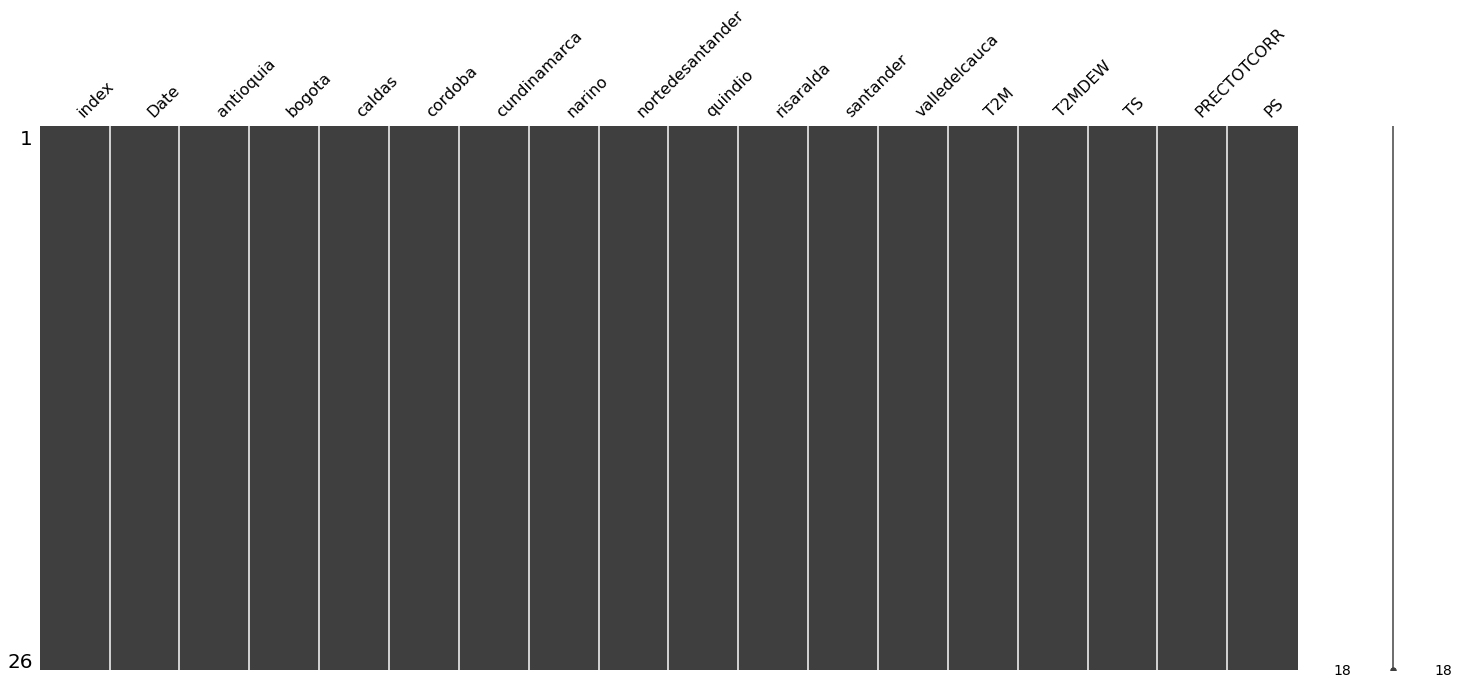

In [15]:
import missingno as msno

msno.matrix(msno.nullity_sort(mutations, sort='descending'))

In [16]:
mutations.columns

Index(['index', 'Date', 'antioquia', 'bogota', 'caldas', 'cordoba',
       'cundinamarca', 'narino', 'nortedesantander', 'quindio', 'risaralda',
       'santander', 'valledelcauca', 'T2M', 'T2MDEW', 'TS', 'PRECTOTCORR',
       'PS'],
      dtype='object')

In [17]:
#mutations.drop(columns=['Unnamed: 0'], inplace=True)
df_copy = mutations.copy() 
df_copy =df_copy[['index', 'Date', 'antioquia', 'bogota', 'caldas', 'cordoba',
       'cundinamarca', 'narino', 'nortedesantander', 'quindio', 'risaralda',
       'santander', 'valledelcauca']]

df_copy.index = df_copy.Date
df_copy = df_copy.T
df_copy = df_copy.iloc[1:].reset_index()
df_copy.rename(columns={'index':'NOMBRE_DPT'}, inplace=True)
df_copy.NOMBRE_DPT = df_copy.NOMBRE_DPT.str.strip()
df_copy = df_copy[1:]
df_copy

Date        NOMBRE_DPT  ... 2021-08-04 00:00:00
1            antioquia  ...                   0
2               bogota  ...                   0
3               caldas  ...                   0
4              cordoba  ...                   0
5         cundinamarca  ...                   0
6               narino  ...                   0
7     nortedesantander  ...                   0
8              quindio  ...                   0
9            risaralda  ...                   1
10           santander  ...                   0
11       valledelcauca  ...                   9

[11 rows x 27 columns]

In [18]:
df_copy['T2M']    = mutations["T2M"]
df_copy['T2MDEW'] = mutations["T2MDEW"]
df_copy['TS']     = mutations["TS"]
df_copy['PRECTOTCORR'] = mutations["PRECTOTCORR"]
df_copy['PS']     = mutations["PS"]
df_copy

Date        NOMBRE_DPT 2021-04-04 00:00:00  ... PRECTOTCORR         PS
1            antioquia                   1  ...    0.281111  87.589630
2               bogota                   0  ...    3.426667  87.682099
3               caldas                   0  ...    1.134938  87.701975
4              cordoba                   0  ...    6.199753  87.645309
5         cundinamarca                   0  ...    6.986049  87.670494
6               narino                   0  ...   16.771111  87.732222
7     nortedesantander                   0  ...   16.125802  87.836420
8              quindio                   0  ...    3.030741  87.807778
9            risaralda                   0  ...    4.318025  87.794568
10           santander                   0  ...    0.593086  87.715802
11       valledelcauca                   0  ...    3.285556  87.683580

[11 rows x 32 columns]

In [19]:
df_copy = df_copy.merge(df_places, how='inner', on=['NOMBRE_DPT'])
mutations = df_copy.reset_index()
mutations

index  ...                                           geometry
0       0  ...  POLYGON ((-76.40834 8.74648, -76.40755 8.74623...
1       1  ...  POLYGON ((-74.06964 4.82983, -74.06946 4.82982...
2       2  ...  POLYGON ((-74.67036 5.77004, -74.66925 5.76905...
3       3  ...  POLYGON ((-75.87806 9.42309, -75.87627 9.42305...
4       4  ...  POLYGON ((-74.31495 5.80046, -74.31410 5.80039...
5       5  ...  POLYGON ((-78.14140 2.67691, -78.14140 2.67202...
6       6  ...  POLYGON ((-73.00339 9.28749, -73.00328 9.28744...
7       7  ...  POLYGON ((-75.66522 4.70053, -75.66044 4.69892...
8       8  ...  POLYGON ((-76.00835 5.56453, -76.00825 5.56368...
9       9  ...  POLYGON ((-73.72309 7.96963, -73.72066 7.96789...
10     10  ...  POLYGON ((-76.08427 5.03608, -76.07898 5.03500...

[11 rows x 39 columns]

In [21]:
mutations.to_csv('Covid19_alpha_preprocessed_final.csv')

### Population

In [23]:
population = pd.read_csv('Census_data.csv')[['total_population', 'Dpto']]
population.rename(columns={'Dpto':'NOMBRE_DPT'}, inplace=True)
population

total_population        NOMBRE_DPT
0           359602.0           caqueta
1          1243503.0             cauca
2           283197.0          putumayo
3          3789874.0     valledelcauca
4            44431.0           guainia
5            76642.0           vichada
6           379892.0          casanare
7            66056.0          amazonas
8            37690.0            vaupes
9            73081.0          guaviare
10          923472.0            caldas
11          509640.0           quindio
12          839597.0         risaralda
13         5974788.0         antioquia
14          457412.0             choco
15         1335521.0            narino
16         1555596.0           cordoba
17         1909460.0           bolivar
18         1098577.0             cesar
19          825364.0         laguajira
20         1263788.0         magdalena
21          864036.0             sucre
22           48299.0         sanandres
23          239503.0            arauca
24         1135698.0            boyaca
25         2792877.0      cundinamarca
26         1346806.0  nortedesantander
27         7181469.0            bogota
28          919129.0              meta
29         1009548.0             huila
30         2008841.0         santander
31         1228763.0            tolima
32         2342265.0         atlantico

In [24]:
mutations = mutations.merge(population, on=['NOMBRE_DPT'],how='inner')

In [ ]:
#mutations["geometry"]

In [25]:
poly = {
        'type': 'Polygon',
        'coordinates': mutations["geometry"]
}

In [26]:
data = {
    'type': 'features',
    'id':mutations['index'],
    'properies':{        
        'name':mutations['NOMBRE_DPT'],
        'risk':mutations['risk']
    }
}

In [27]:
df = {
    'type': 'FeatureCollection',
    'features': data,
    'geometry': poly 

}

In [28]:
gdf = gpd.GeoDataFrame(mutations)
gdf

index  ... total_population
0       0  ...        5974788.0
1       1  ...        7181469.0
2       2  ...         923472.0
3       3  ...        1555596.0
4       4  ...        2792877.0
5       5  ...        1335521.0
6       6  ...        1346806.0
7       7  ...         509640.0
8       8  ...         839597.0
9       9  ...        2008841.0
10     10  ...        3789874.0

[11 rows x 40 columns]

In [29]:
with open('data_alpha.geojson','w') as f:
    geojson.dump(gdf, f)

In [30]:
departments = "data_alpha.geojson"
# Opening JSON file
f = open(departments,)
 
# returns JSON object as
# a dictionary
data = json.load(f)

In [31]:
data

{'bbox': [-79.0078536049688,
  0.362024746698953,
  -72.0470506372897,
  9.44782713140986],
 'features': [{'bbox': [-77.1270868973338,
    5.41825109367457,
    -73.8795915779962,
    8.88979733618029],
   'geometry': {'coordinates': [[[-76.408338134937, 8.74648427890731],
      [-76.4075536283694, 8.74622946930847],
      [-76.4044623221564, 8.74672324744263],
      [-76.4019640710516, 8.74666441979974],
      [-76.3997244865077, 8.74623307186818],
      [-76.3983375337588, 8.74501757534234],
      [-76.3967250601923, 8.74350672620694],
      [-76.3946640969596, 8.74181315792429],
      [-76.3921576297336, 8.74041902485341],
      [-76.3894970223009, 8.73820980411495],
      [-76.3878093687359, 8.73658808433227],
      [-76.3863847464086, 8.73529857427229],
      [-76.3832128786261, 8.7323876697741],
      [-76.382203371879, 8.73191161312188],
      [-76.3786813569963, 8.72903987713372],
      [-76.3775577523378, 8.72819358437865],
      [-76.3769599232932, 8.72797466920791],
      [-